In [1]:
## Relevant modules.
import pandas as pd
import seaborn as sns
#import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Reading file.
file = 'data/data_panel.csv'
panel = pd.read_csv(file, header=0)
print(panel.head(3), '\n')
print(panel.info())

   doc_code  spec_code                       spec_es  \
0  16449291         22  anestesiologia y reanimacion   
1  31865019         22  anestesiologia y reanimacion   
2   8682278         22  anestesiologia y reanimacion   

                            spec_en  year  n_visits  n_surgeries  n_patients  \
0  anesthesiology and resuscitation  2008        59            1          67   
1  anesthesiology and resuscitation  2008        85            2          89   
2  anesthesiology and resuscitation  2008         6            4           6   

   c_visit  c_surgery  dep_code       department  
0    21.69     205.85        76  valle del cauca  
1    21.69     205.85        76  valle del cauca  
2    21.69     205.85         8        atlantico   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8294 entries, 0 to 8293
Data columns (total 12 columns):
doc_code       8294 non-null int64
spec_code      8294 non-null int64
spec_es        8294 non-null object
spec_en        8294 non-null object

Question:  
How much can specialty, department and year explain the variability of the medical practice in terms of n_patients, n_visits and n_surgeries. If they don't explain much, then there is a good chance that other factors like moral hazard and supplier-induced demand play an important role. 

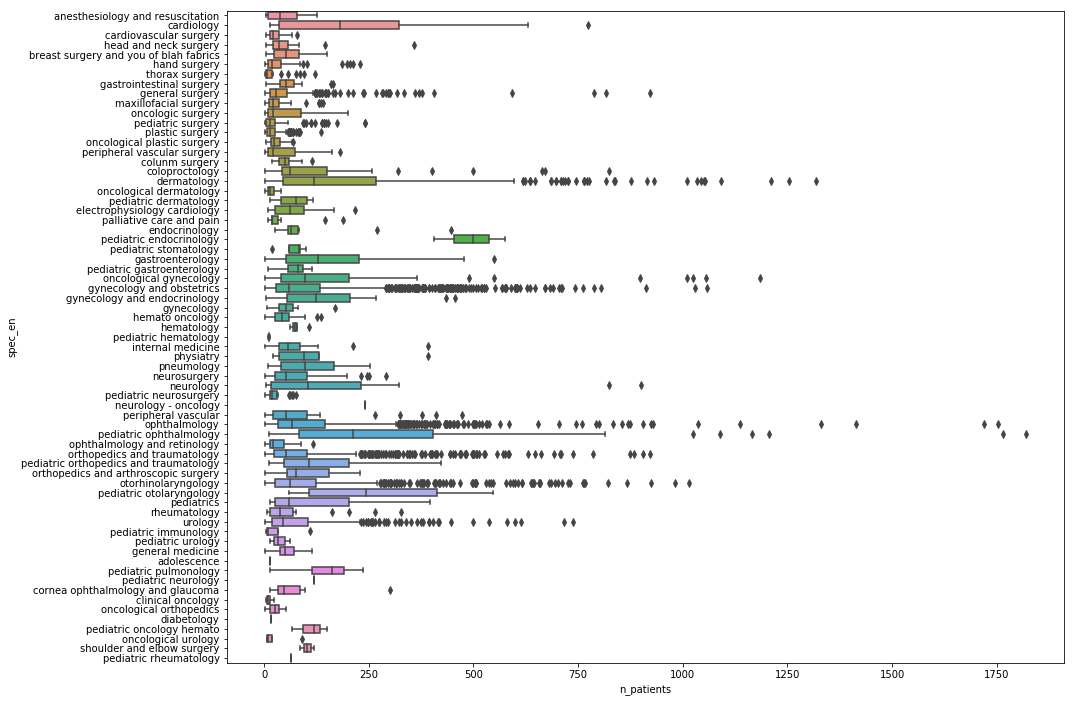

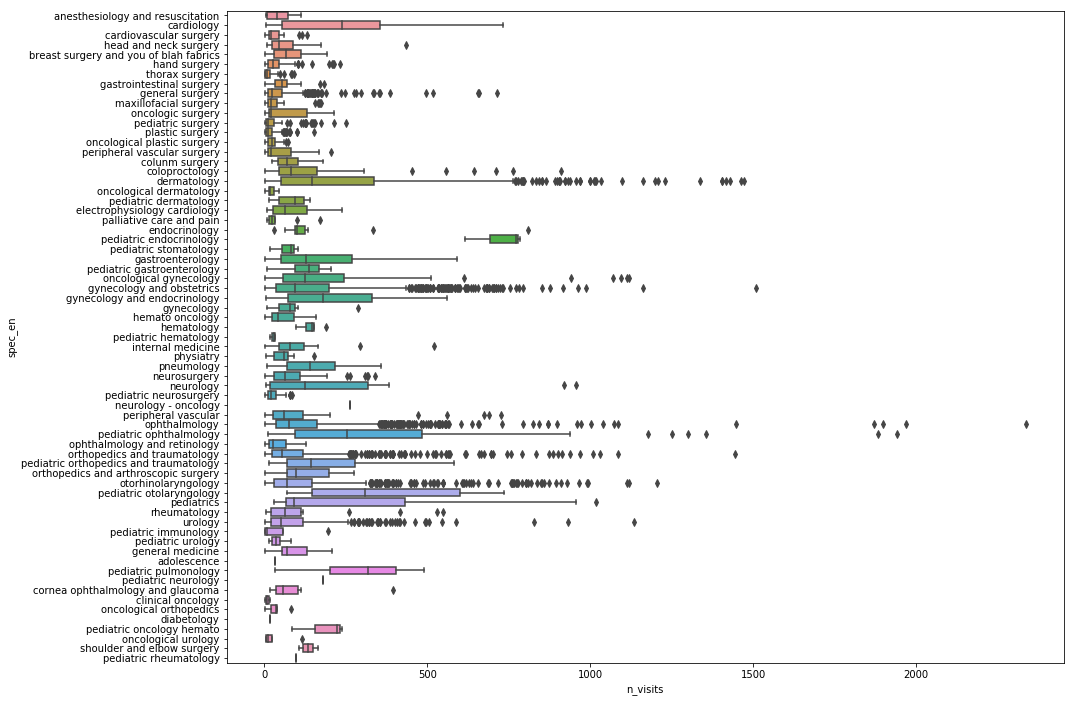

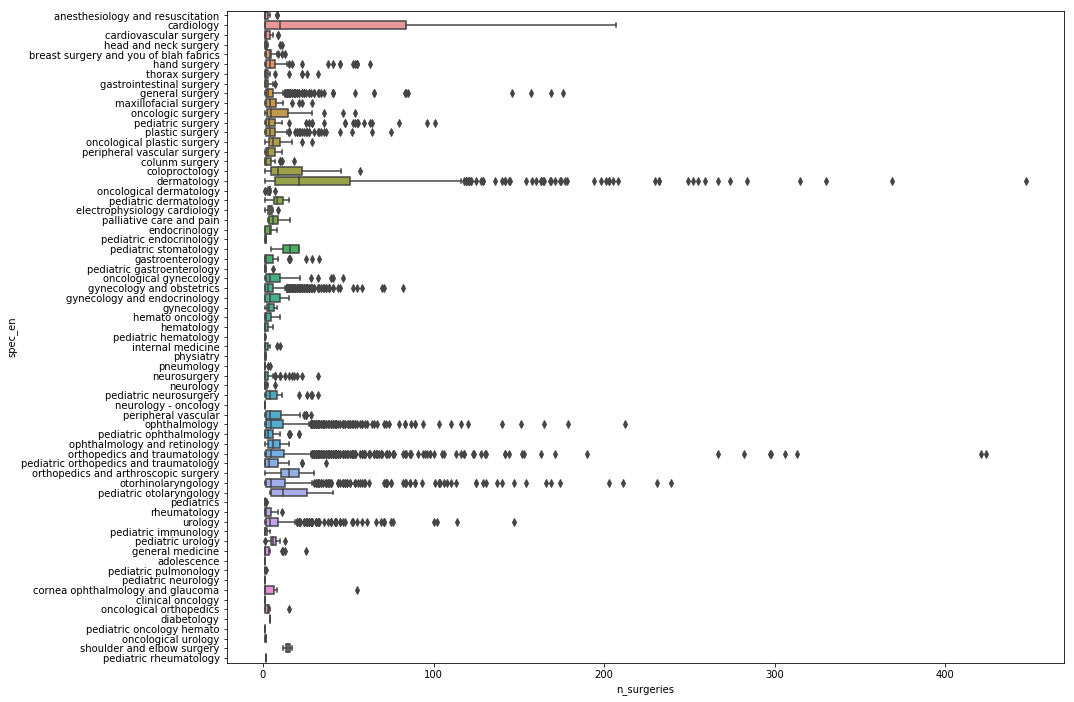

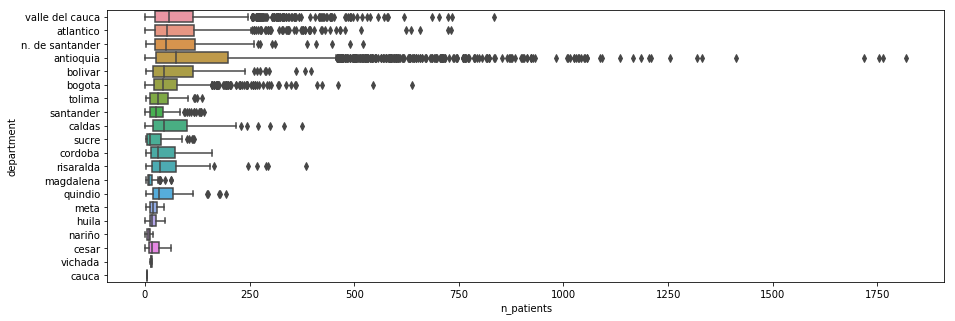

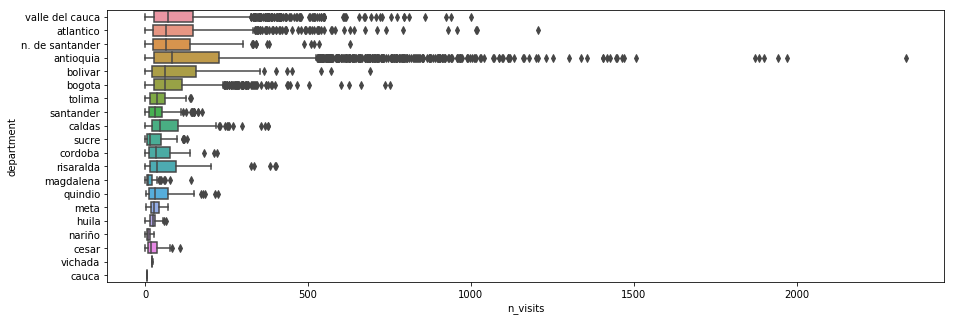

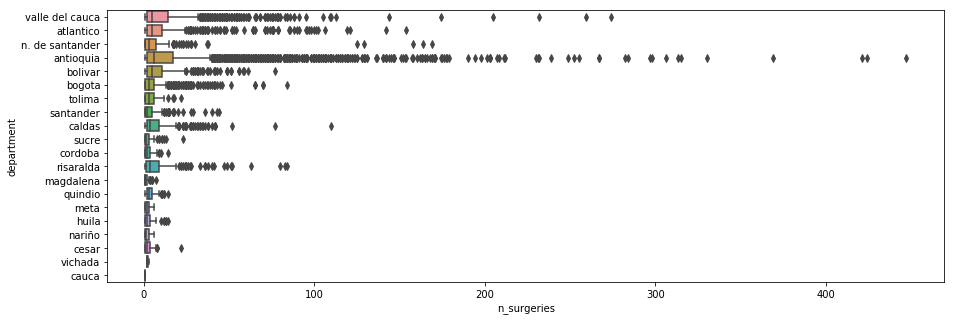

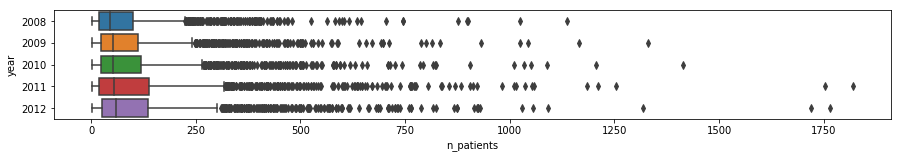

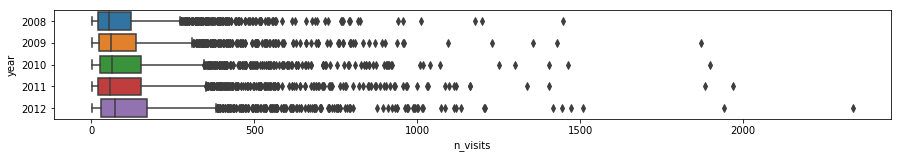

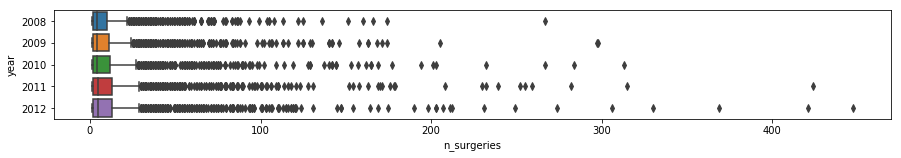

In [3]:
_ = plt.figure(1, figsize=(15,12))
_ = sns.boxplot(x='n_patients', y='spec_en', data=panel, orient='h')

_ = plt.figure(2, figsize=(15,12))
_ = sns.boxplot(x='n_visits', y='spec_en', data=panel, orient='h')

_ = plt.figure(3, figsize=(15,12))
_ = sns.boxplot(x='n_surgeries', y='spec_en', data=panel, orient='h')


_ = plt.figure(4, figsize=(15,5))
_ = sns.boxplot(x='n_patients', y='department', data=panel, orient='h')

_ = plt.figure(5, figsize=(15,5))
_ = sns.boxplot(x='n_visits', y='department', data=panel, orient='h')

_ = plt.figure(6, figsize=(15,5))
_ = sns.boxplot(x='n_surgeries', y='department', data=panel, orient='h')


_ = plt.figure(7, figsize=(15,2))
_ = sns.boxplot(x='n_patients', y='year', data=panel, orient='h')

_ = plt.figure(8, figsize=(15,2))
_ = sns.boxplot(x='n_visits', y='year', data=panel, orient='h')

_ = plt.figure(9, figsize=(15,2))
_ = sns.boxplot(x='n_surgeries', y='year', data=panel, orient='h')

plt.show()

In [4]:
## Creating panel_spec based on specialty
group1 = panel.groupby(['spec_code','spec_en','year'])[['doc_code']].count()
group2 = panel.groupby(['spec_code','spec_en','year'])[['n_visits','n_surgeries','n_patients',\
                                                             'c_visit','c_surgery']].mean()

panel_spec = pd.merge(group1, group2, on=['spec_code','spec_en','year'])
panel_spec.columns = ['doc_count','mean_n_visits','mean_n_surgeries','mean_n_patients',\
                       'mean_c_visit','mean_c_surgery']

panel_spec.reset_index(inplace=True)
print(panel_spec.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
spec_code           297 non-null int64
spec_en             297 non-null object
year                297 non-null int64
doc_count           297 non-null int64
mean_n_visits       297 non-null float64
mean_n_surgeries    297 non-null float64
mean_n_patients     297 non-null float64
mean_c_visit        295 non-null float64
mean_c_surgery      296 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 21.0+ KB
None


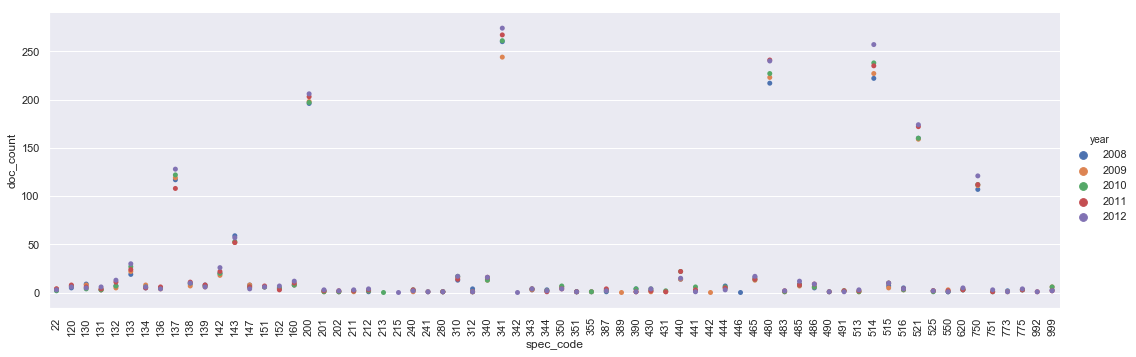

In [5]:
## Illustrating the number of doctors observed for each specialty.
sns.set()
_ = sns.catplot(x='spec_code', y='doc_count', data=panel_spec,\
                     jitter=False, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=90)
plt.show()

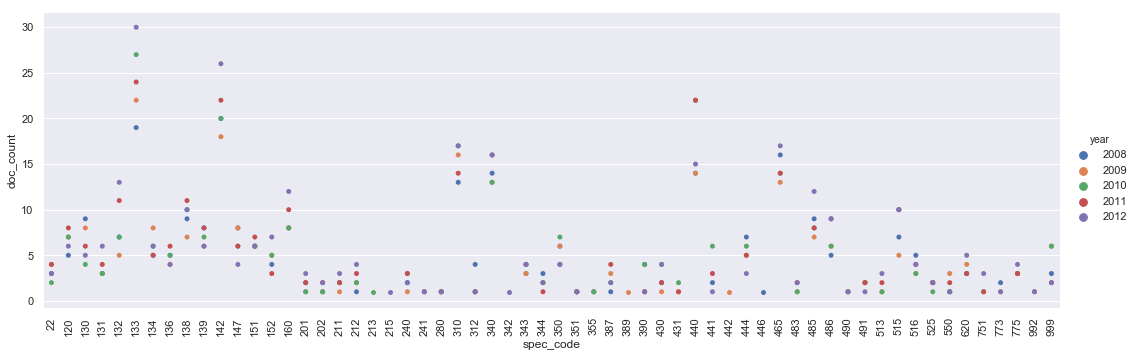

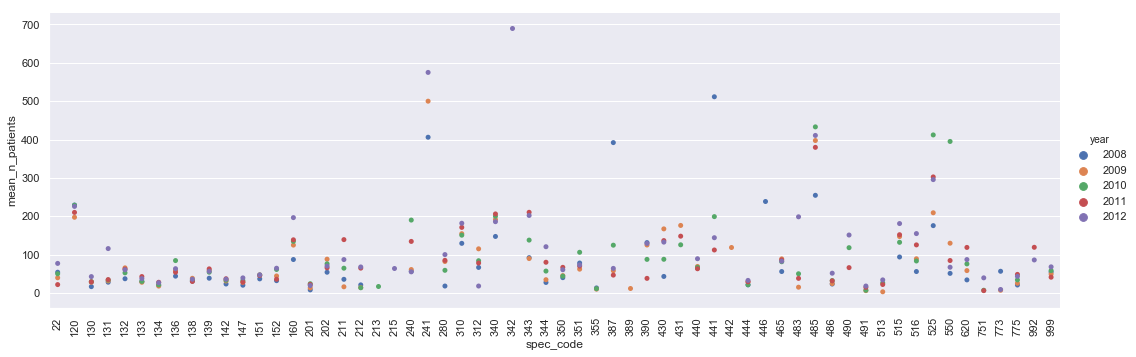

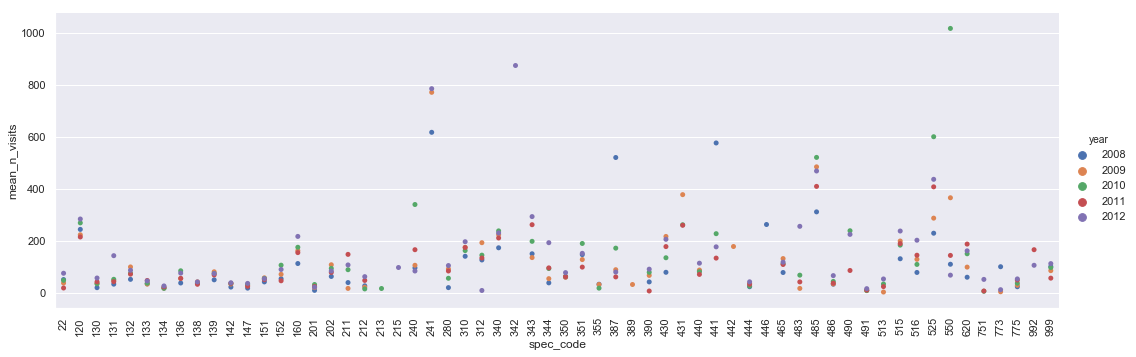

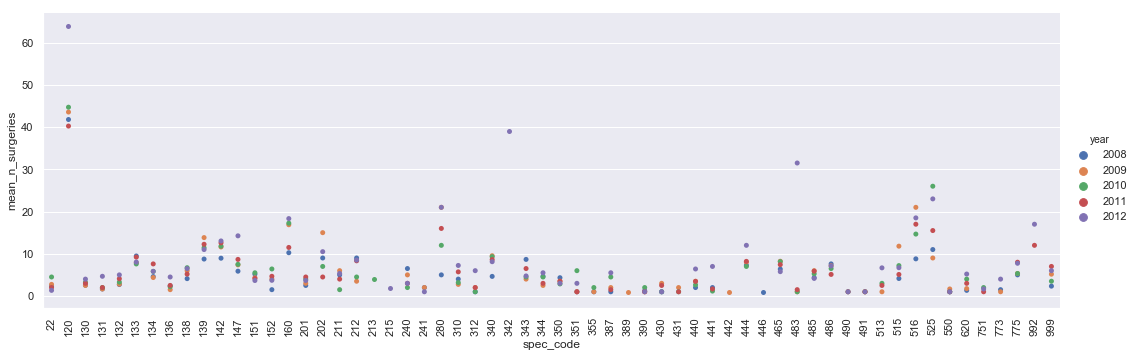

In [6]:
## Only specialties with less than 50 doctors observed per year.
spec_less_50_doc = panel_spec['doc_count'] < 50

_ = sns.catplot(x='spec_code', y='doc_count', data=panel_spec[spec_less_50_doc],\
                     jitter=False, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=90)

_ = sns.catplot(x='spec_code', y='mean_n_patients', data=panel_spec[spec_less_50_doc],\
                     jitter=False, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=90)

_ = sns.catplot(x='spec_code', y='mean_n_visits', data=panel_spec[spec_less_50_doc],\
                     jitter=False, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=90)

_ = sns.catplot(x='spec_code', y='mean_n_surgeries', data=panel_spec[spec_less_50_doc],\
                     jitter=False, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=90)

plt.show()

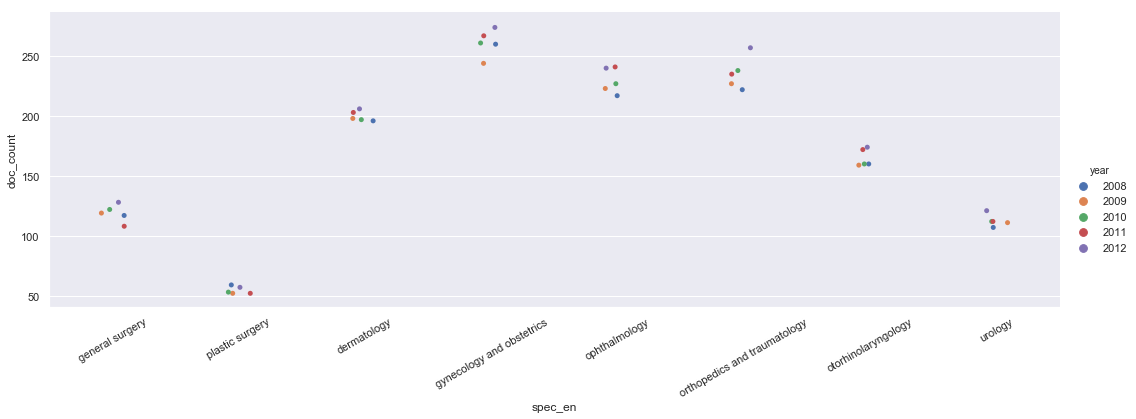

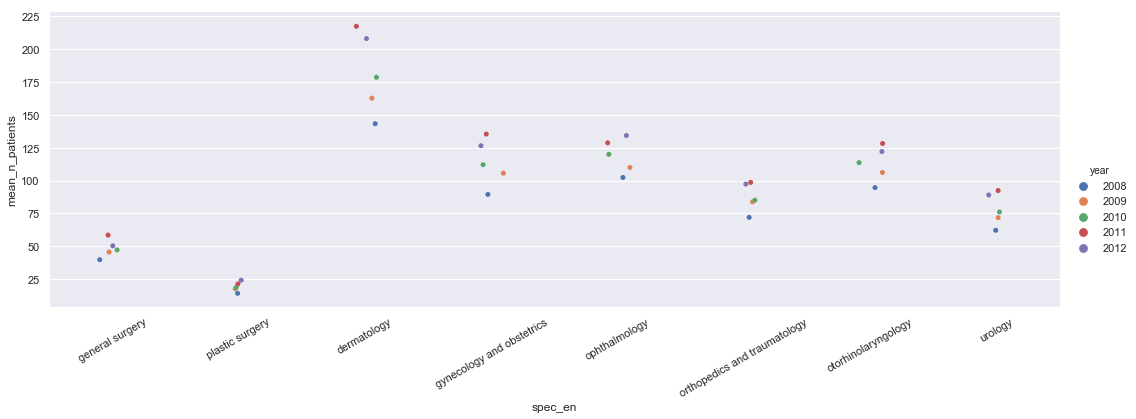

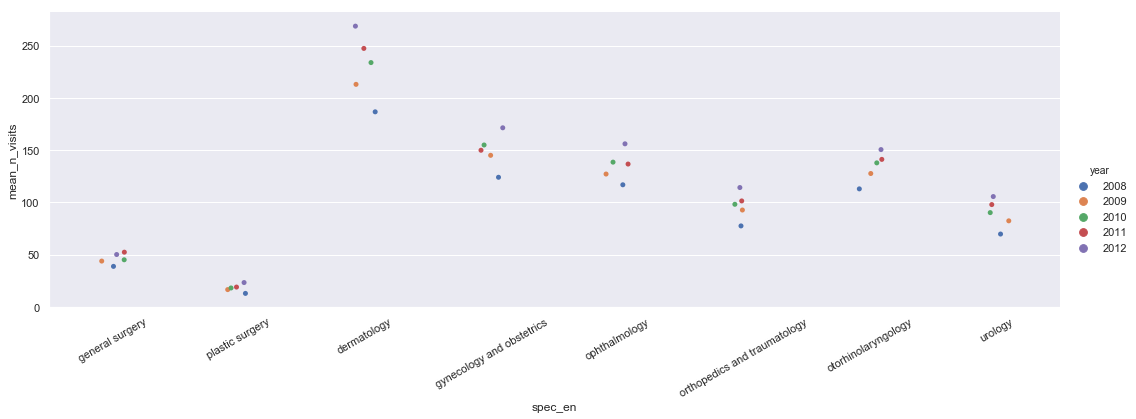

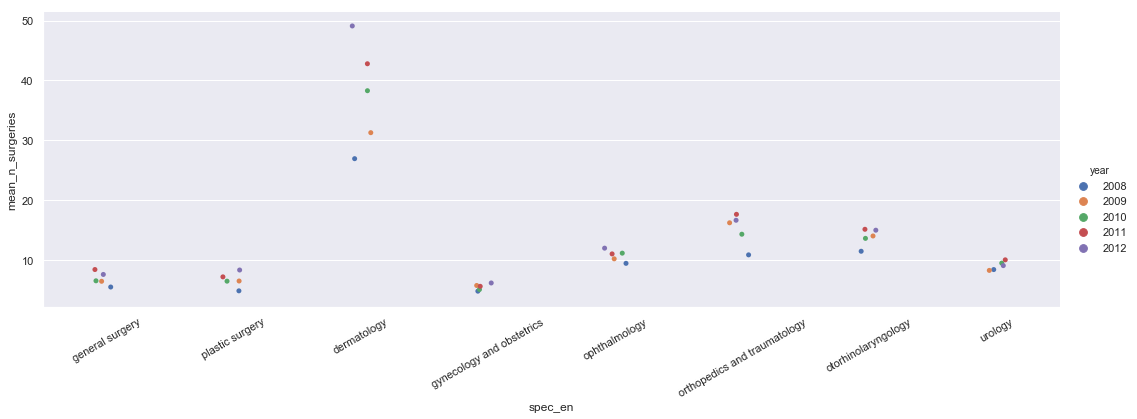

In [7]:
## Only specialties with more than 50 doctors observed per year.
spec_more_50_doc = panel_spec['doc_count'] > 50

_ = sns.catplot(x='spec_en', y='doc_count', data=panel_spec[spec_more_50_doc],\
                     jitter=True, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=30)

_ = sns.catplot(x='spec_en', y='mean_n_patients', data=panel_spec[spec_more_50_doc],\
                     jitter=True, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=30)

_ = sns.catplot(x='spec_en', y='mean_n_visits', data=panel_spec[spec_more_50_doc],\
                     jitter=True, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=30)

_ = sns.catplot(x='spec_en', y='mean_n_surgeries', data=panel_spec[spec_more_50_doc],\
                     jitter=True, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=30)

plt.show()

In [8]:
spec_list = []
for i in panel_spec[spec_more_50_doc][['spec_code','spec_en']].values:
    spec_list.append(tuple(i))
spec_list = pd.Series(spec_list).unique()
spec_code_list = [i[0] for i in spec_list]
subpanel = panel[panel['spec_code'].isin(spec_code_list)]
subpanel.reset_index(drop=True, inplace=True)

group1 = subpanel.groupby(['dep_code','department','year'])[['doc_code']].count()
group2 = subpanel.groupby(['dep_code','department','year'])[['n_visits','n_surgeries','n_patients',\
                                                             'c_visit','c_surgery']].mean()

subpanel_dep = pd.merge(group1, group2, on=['dep_code','department','year'])
subpanel_dep.columns = ['doc_count','mean_n_visits','mean_n_surgeries','mean_n_patients',\
                       'mean_c_visit','mean_c_surgery']

subpanel_dep.reset_index(inplace=True)
print(subpanel_dep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 9 columns):
dep_code            94 non-null int64
department          94 non-null object
year                94 non-null int64
doc_count           94 non-null int64
mean_n_visits       94 non-null float64
mean_n_surgeries    94 non-null float64
mean_n_patients     94 non-null float64
mean_c_visit        94 non-null float64
mean_c_surgery      94 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 6.7+ KB
None


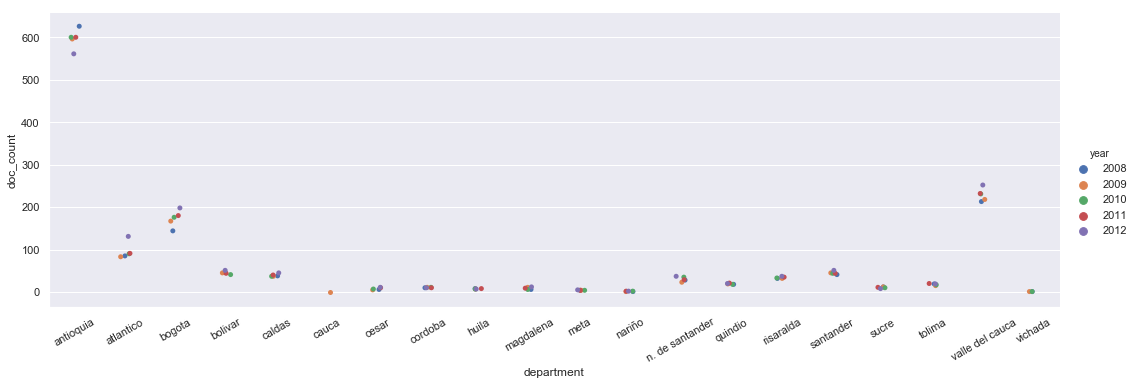

In [9]:
fig = sns.catplot(x='department', y='doc_count', data=subpanel_dep,\
                     jitter=True, hue='year', height=5, aspect=3)
fig.set_xticklabels(rotation=30)
plt.show()

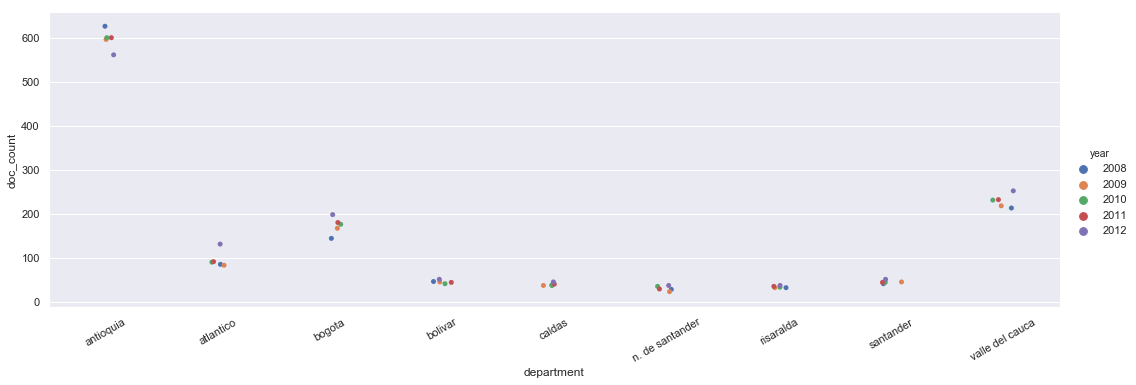

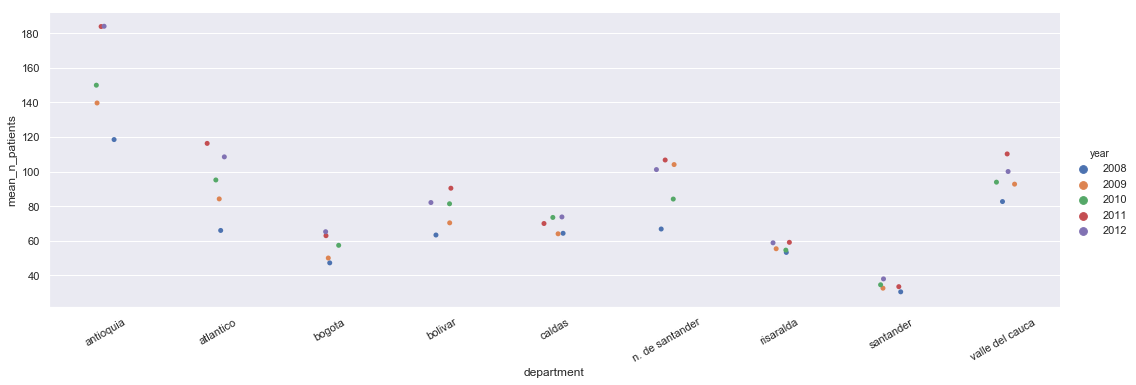

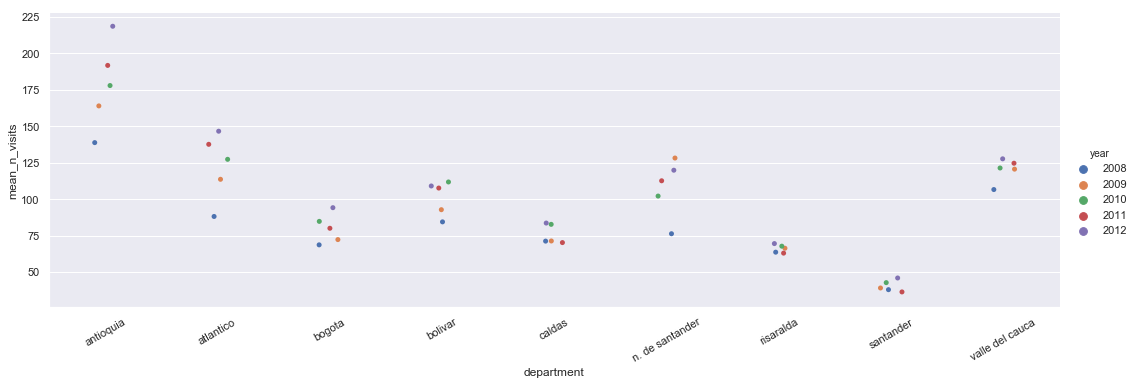

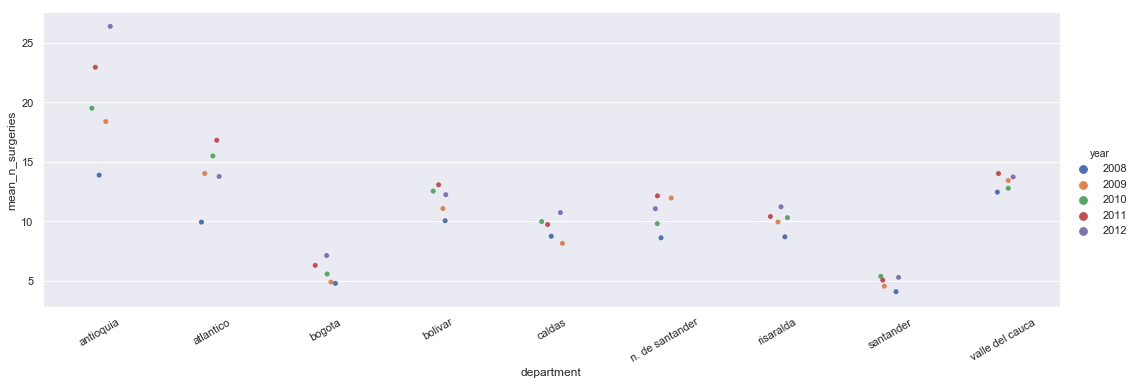

In [10]:
dep_more_22_doc = subpanel_dep['doc_count'] > 22

_ = sns.catplot(x='department', y='doc_count', data=subpanel_dep[dep_more_22_doc],\
                     jitter=True, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=30)

_ = sns.catplot(x='department', y='mean_n_patients', data=subpanel_dep[dep_more_22_doc],\
                     jitter=True, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=30)

_ = sns.catplot(x='department', y='mean_n_visits', data=subpanel_dep[dep_more_22_doc],\
                     jitter=True, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=30)

_ = sns.catplot(x='department', y='mean_n_surgeries', data=subpanel_dep[dep_more_22_doc],\
                     jitter=True, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=30)

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 12 columns):
doc_code       6444 non-null int64
spec_code      6444 non-null int64
spec_es        6444 non-null object
spec_en        6444 non-null object
year           6444 non-null int64
n_visits       6444 non-null int64
n_surgeries    6444 non-null int64
n_patients     6444 non-null int64
c_visit        6444 non-null float64
c_surgery      6444 non-null float64
dep_code       6444 non-null int64
department     6444 non-null object
dtypes: float64(2), int64(7), object(3)
memory usage: 604.2+ KB
None


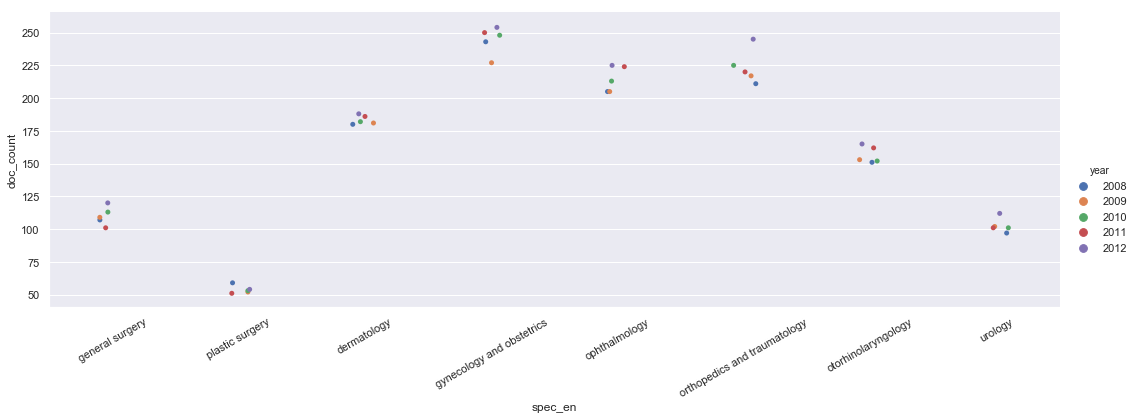

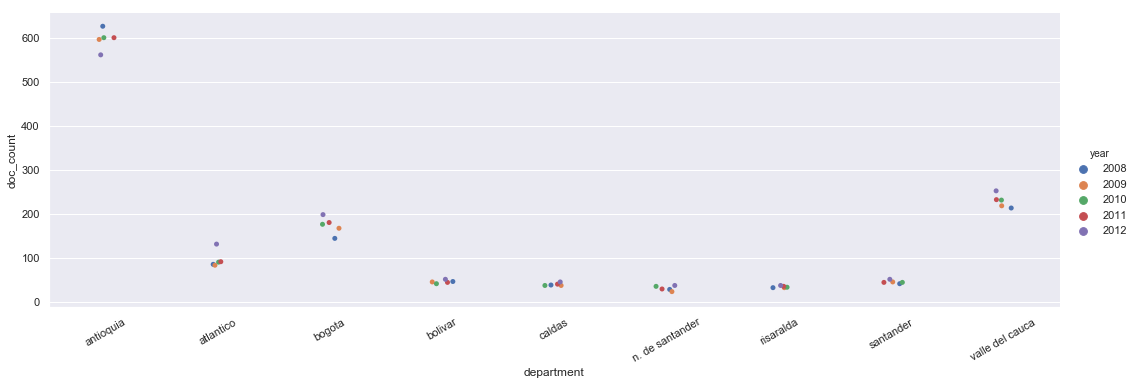

In [11]:
## ATTENTION!
## Be careful with this cell, don't run it more than once, it is redefining subpanel.
dep_list = []
for i in subpanel_dep[dep_more_22_doc][['dep_code','department']].values:
    dep_list.append(tuple(i))
dep_list = pd.Series(dep_list).unique()
dep_code_list = [i[0] for i in dep_list]

## Here it is the new subpanel with only spec_more_50_doc and dep_more_22_doc.
subpanel = panel[panel['spec_code'].isin(spec_code_list) & panel['dep_code'].isin(dep_code_list)]
subpanel.reset_index(drop=True, inplace=True)
print(subpanel.info())

group1 = subpanel.groupby(['spec_code','spec_en','year'])[['doc_code']].count()
group2 = subpanel.groupby(['spec_code','spec_en','year'])[['n_visits','n_surgeries','n_patients',\
                                                             'c_visit','c_surgery']].mean()
subpanel_spec = pd.merge(group1, group2, on=['spec_code','spec_en','year'])
subpanel_spec.columns = ['doc_count','mean_n_visits','mean_n_surgeries','mean_n_patients',\
                       'mean_c_visit','mean_c_surgery']
subpanel_spec.reset_index(inplace=True)

_ = sns.catplot(x='spec_en', y='doc_count', data=subpanel_spec,\
                     jitter=True, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=30)

group1 = subpanel.groupby(['dep_code','department','year'])[['doc_code']].count()
group2 = subpanel.groupby(['dep_code','department','year'])[['n_visits','n_surgeries','n_patients',\
                                                             'c_visit','c_surgery']].mean()
subpanel_dep = pd.merge(group1, group2, on=['dep_code','department','year'])
subpanel_dep.columns = ['doc_count','mean_n_visits','mean_n_surgeries','mean_n_patients',\
                       'mean_c_visit','mean_c_surgery']
subpanel_dep.reset_index(inplace=True)

_ = sns.catplot(x='department', y='doc_count', data=subpanel_dep,\
                     jitter=True, hue='year', height=5, aspect=3)
_.set_xticklabels(rotation=30)

plt.show()

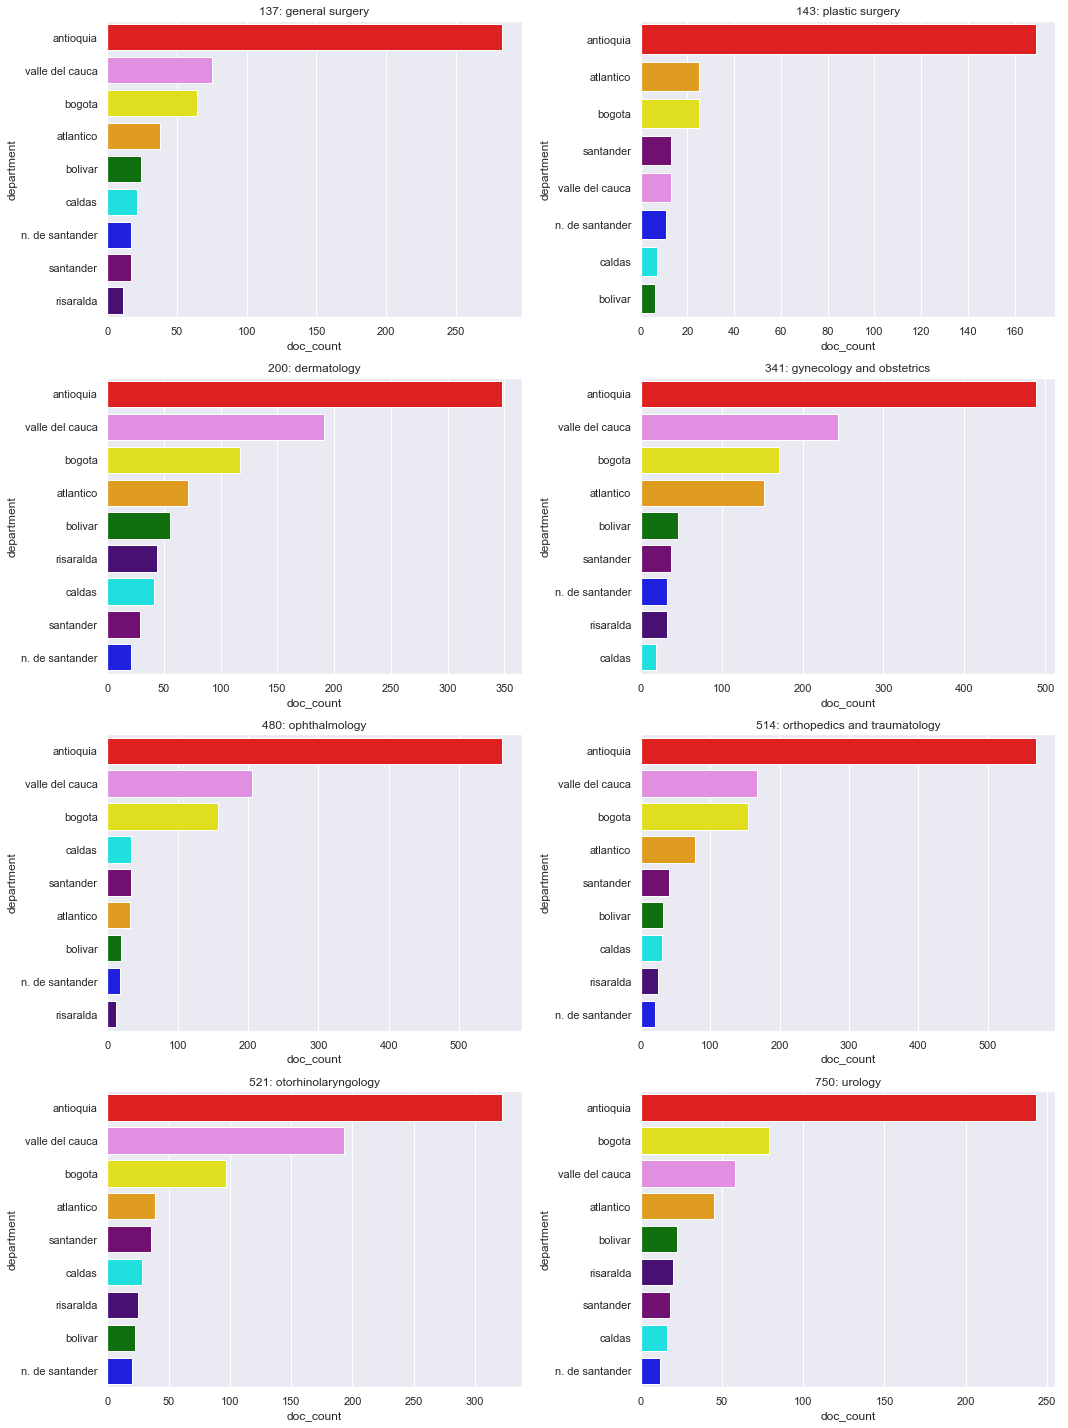

In [12]:
colors = ['red','orange','yellow','green','cyan','blue','indigo','purple','violet']
dep_name_list = [i[1] for i in dep_list]
#dep_name_list = subpanel['department'].unique()
dic_colors = dict(zip(dep_name_list, colors))

positions = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]
tuples = zip(positions, spec_list)

fig, ax = plt.subplots(4, 2, figsize=(15,20))
for i in tuples:
    strainer = subpanel['spec_code'] == i[1][0]
    df = subpanel[strainer].groupby(['dep_code','department'])[['doc_code']].count()
    df.reset_index(inplace=True)
    df.rename(columns={'doc_code': 'doc_count'}, inplace=True)
    df.sort_values('doc_count', ascending=False, inplace=True)
    ax[i[0][0],i[0][1]].title.set_text(str(i[1][0]) + ': ' + str(i[1][1]))
    _ = sns.catplot(x='doc_count', y='department', data=df,
                    palette=dic_colors, orient='h', kind='bar', ax=ax[i[0][0],i[0][1]])
    plt.close()

plt.tight_layout()
plt.show()

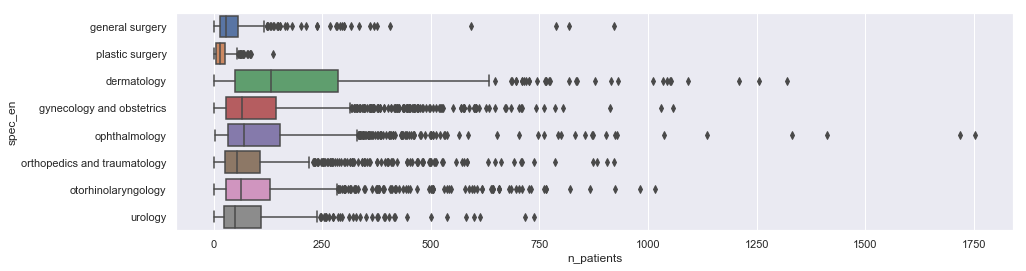

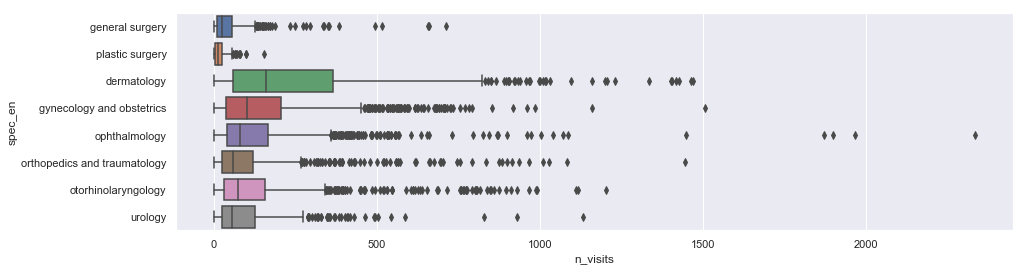

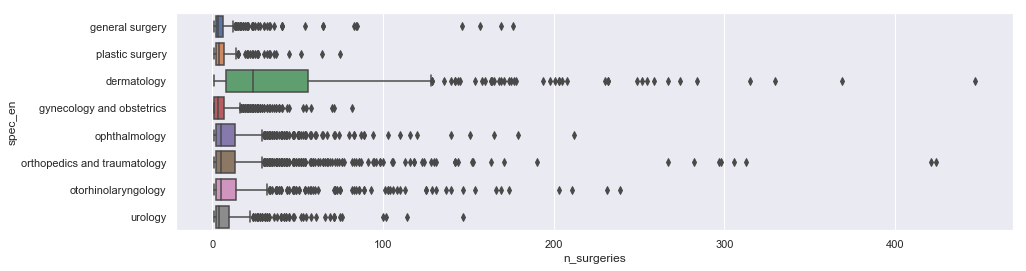

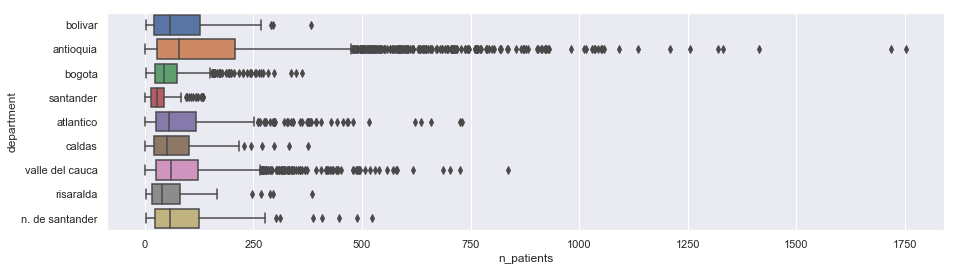

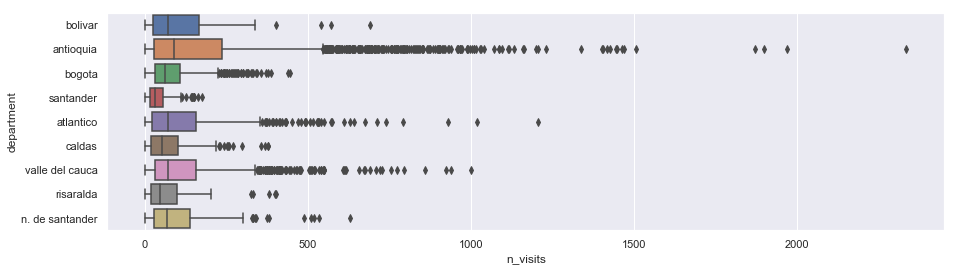

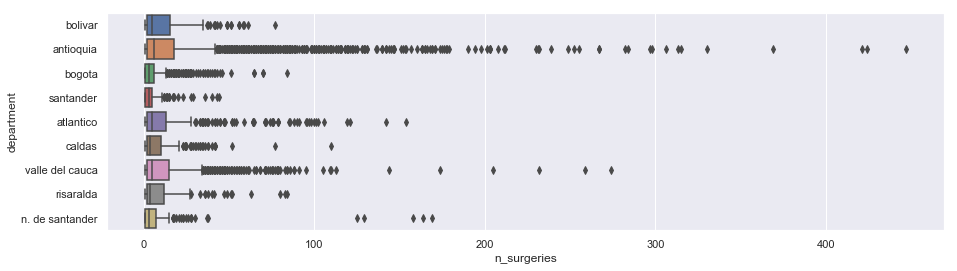

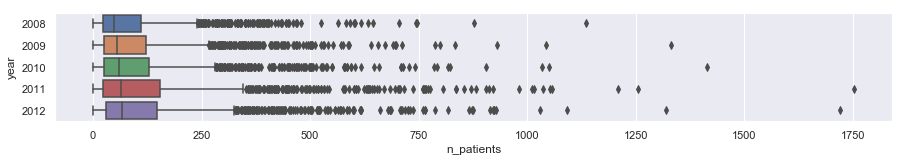

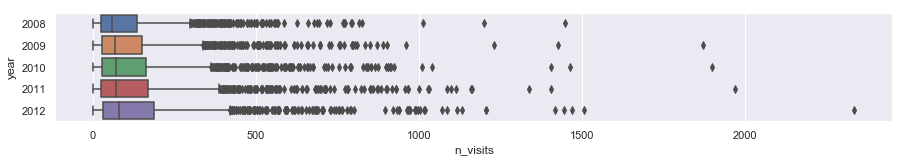

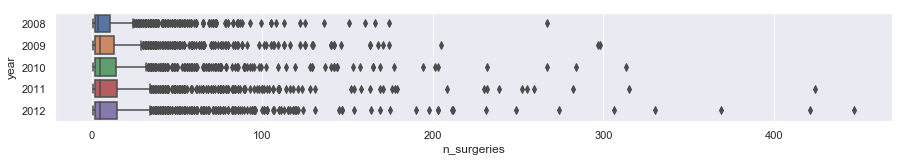

In [13]:
_ = plt.figure(1, figsize=(15,4))
_ = sns.boxplot(x='n_patients', y='spec_en', data=subpanel, orient='h')

_ = plt.figure(2, figsize=(15,4))
_ = sns.boxplot(x='n_visits', y='spec_en', data=subpanel, orient='h')

_ = plt.figure(3, figsize=(15,4))
_ = sns.boxplot(x='n_surgeries', y='spec_en', data=subpanel, orient='h')


_ = plt.figure(4, figsize=(15,4))
_ = sns.boxplot(x='n_patients', y='department', data=subpanel, orient='h')

_ = plt.figure(5, figsize=(15,4))
_ = sns.boxplot(x='n_visits', y='department', data=subpanel, orient='h')

_ = plt.figure(6, figsize=(15,4))
_ = sns.boxplot(x='n_surgeries', y='department', data=subpanel, orient='h')


_ = plt.figure(7, figsize=(15,2))
_ = sns.boxplot(x='n_patients', y='year', data=subpanel, orient='h')

_ = plt.figure(8, figsize=(15,2))
_ = sns.boxplot(x='n_visits', y='year', data=subpanel, orient='h')

_ = plt.figure(9, figsize=(15,2))
_ = sns.boxplot(x='n_surgeries', y='year', data=subpanel, orient='h')

plt.show()

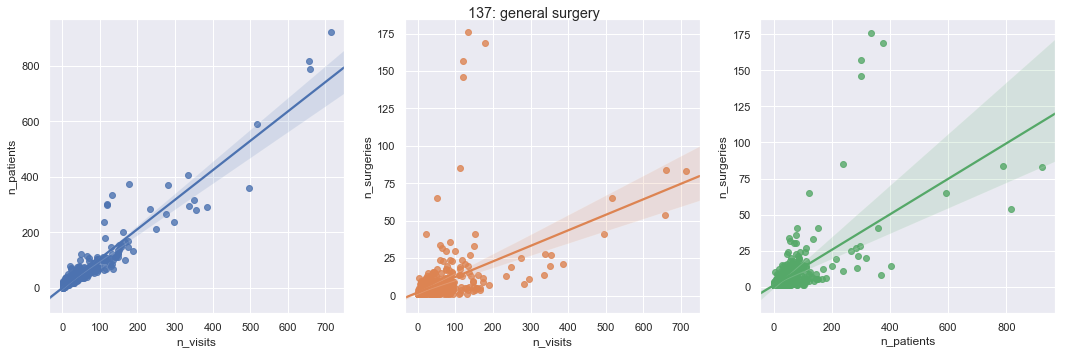

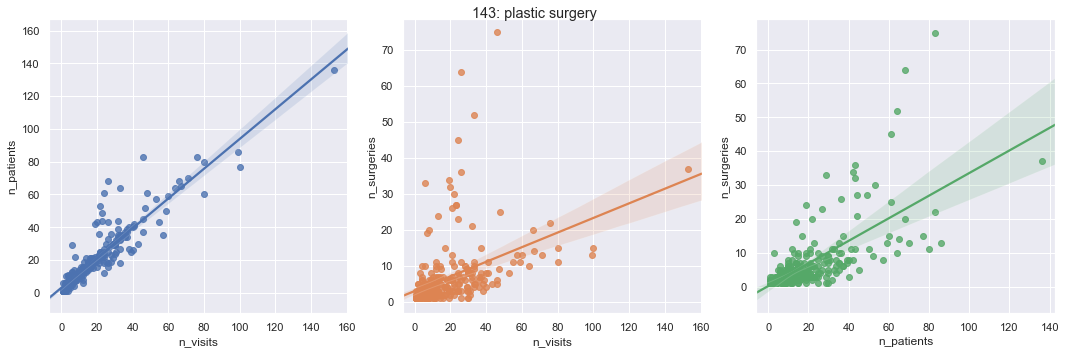

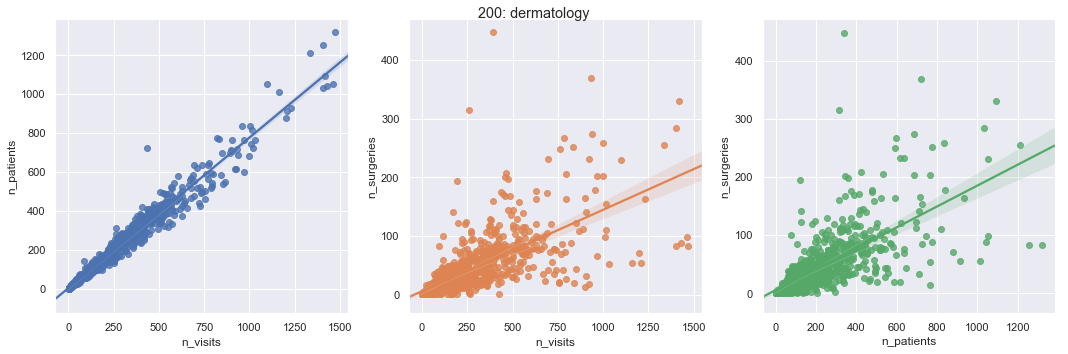

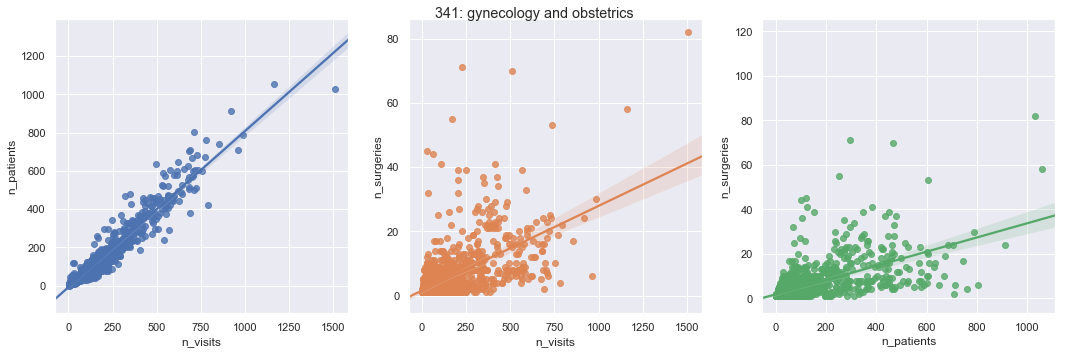

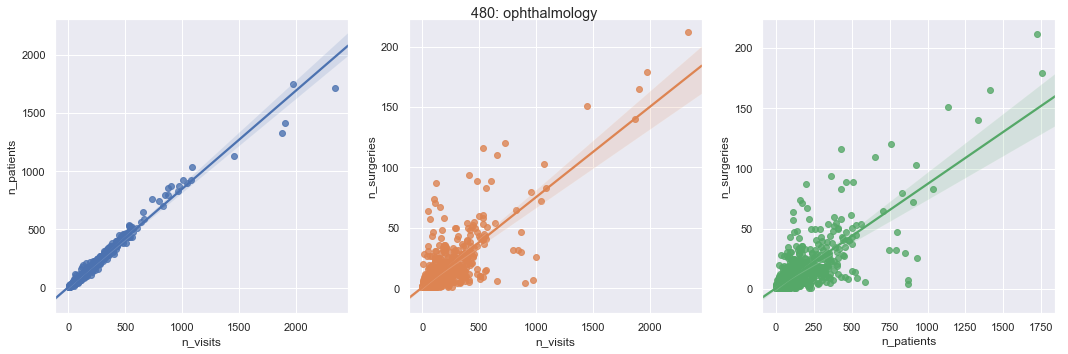

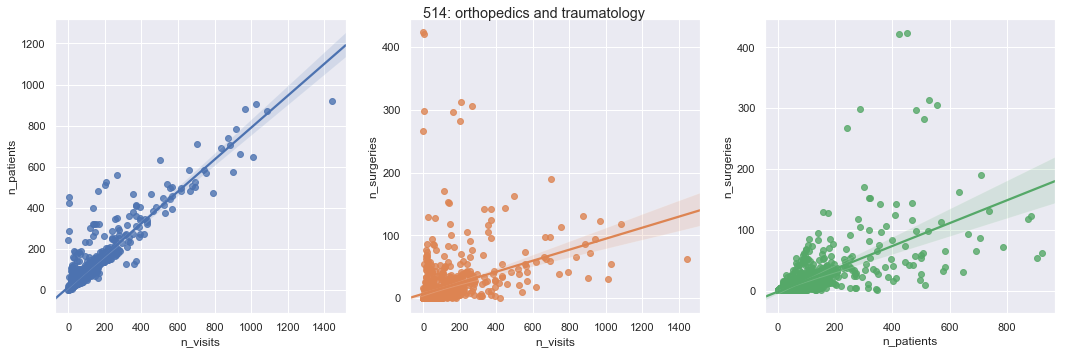

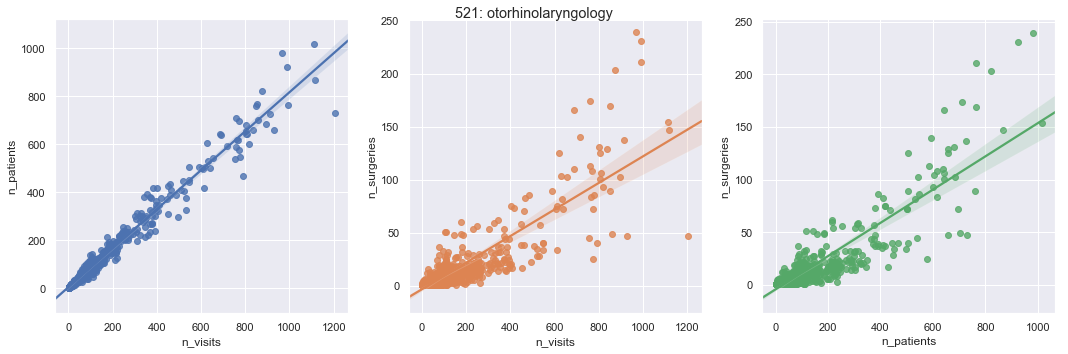

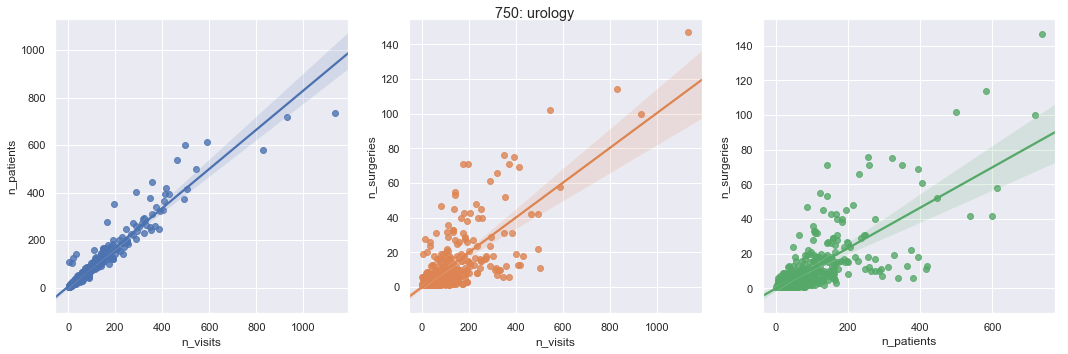

In [14]:
for i in spec_list:
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    fig.suptitle(str(i[0]) + ': ' + str(i[1]))
    sns.regplot(x='n_visits', y='n_patients', data=subpanel[subpanel['spec_code'] == i[0]], ax=ax[0])
    sns.regplot(x='n_visits', y='n_surgeries', data=subpanel[subpanel['spec_code'] == i[0]], ax=ax[1])
    sns.regplot(x='n_patients', y='n_surgeries', data=subpanel[subpanel['spec_code'] == i[0]], ax=ax[2])
    plt.tight_layout()
plt.show()

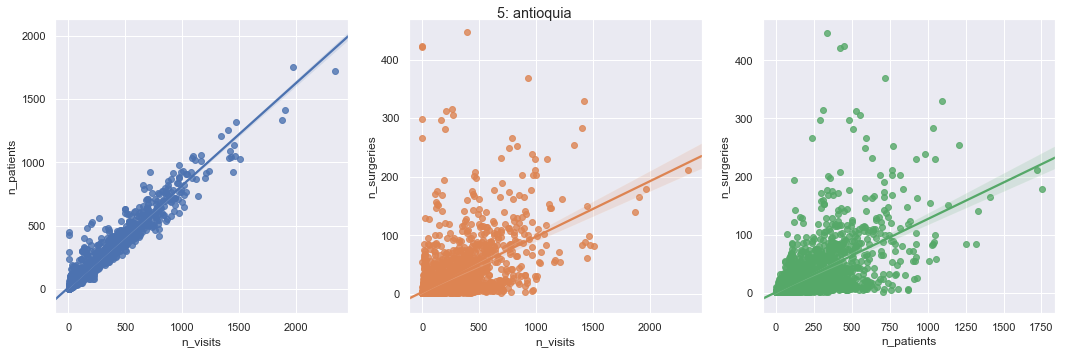

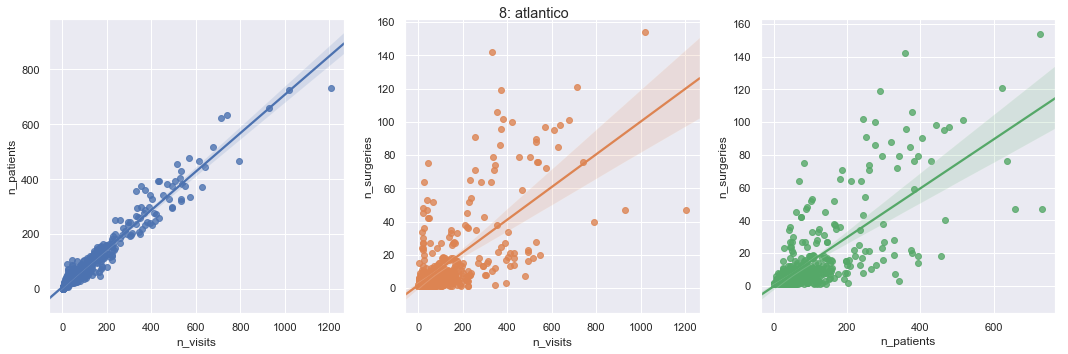

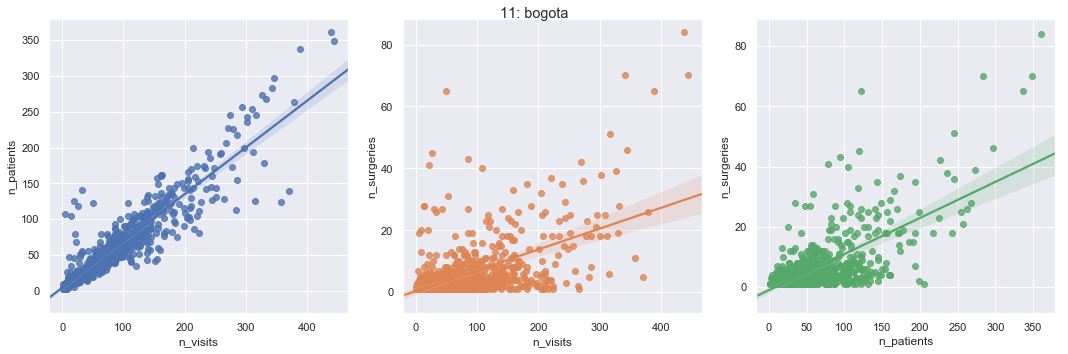

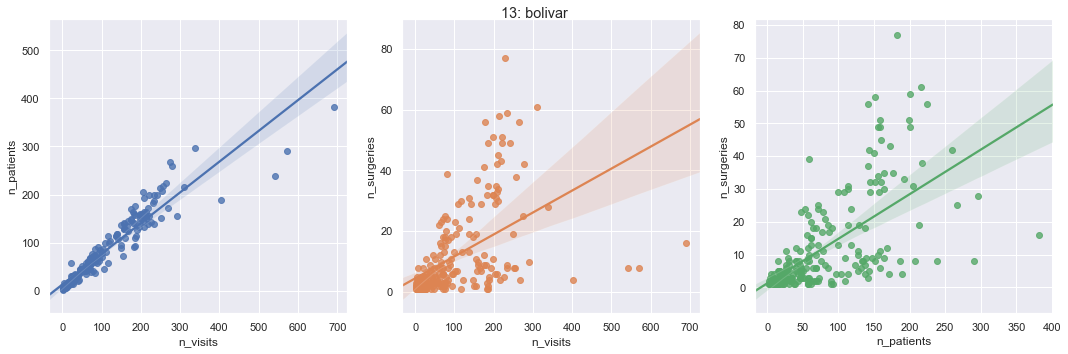

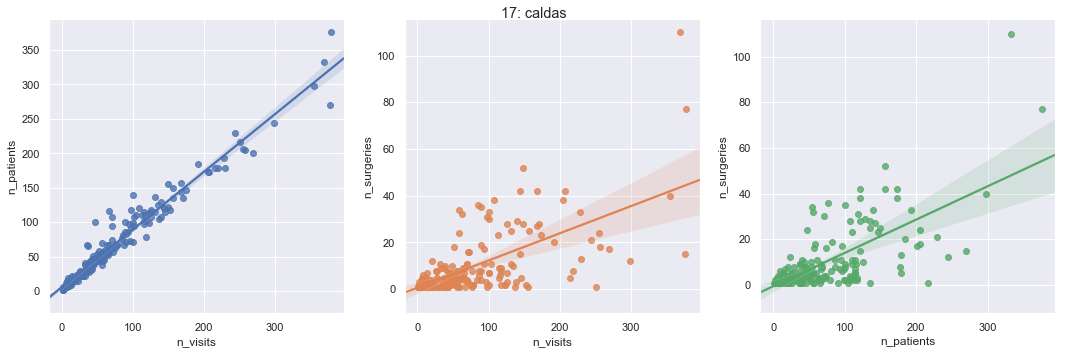

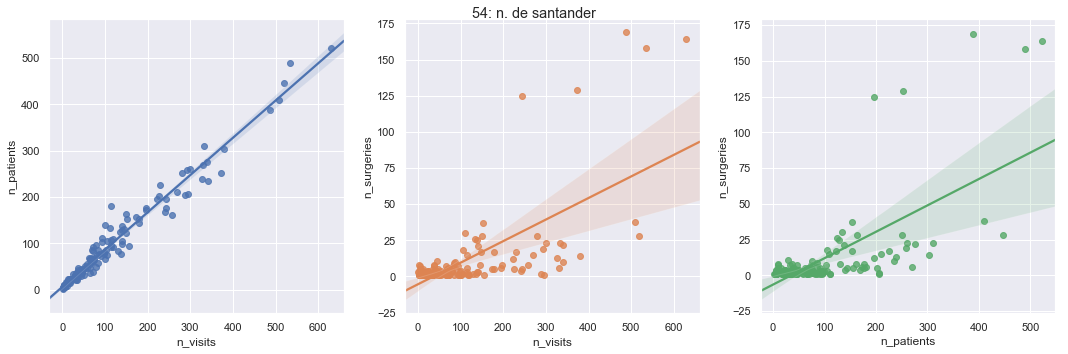

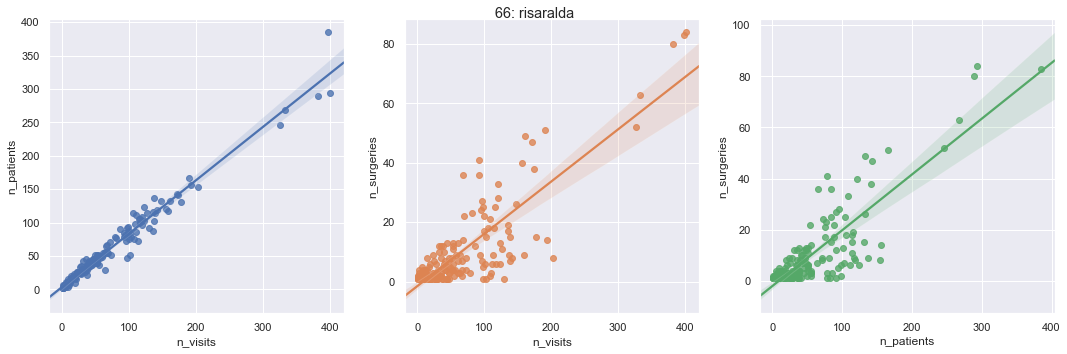

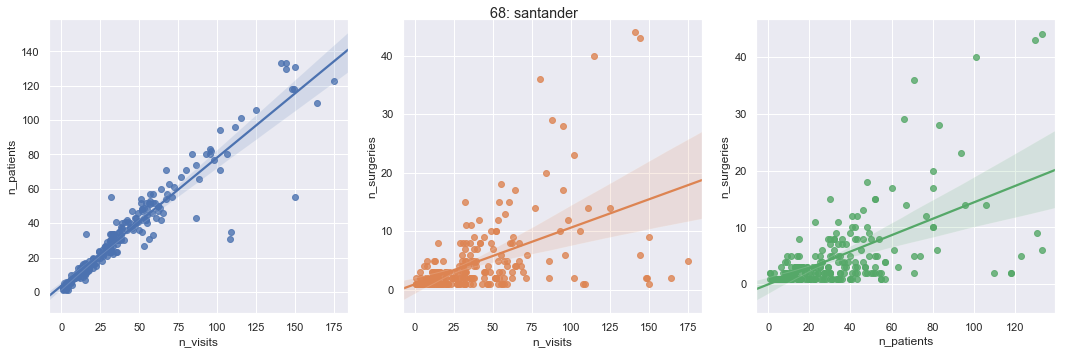

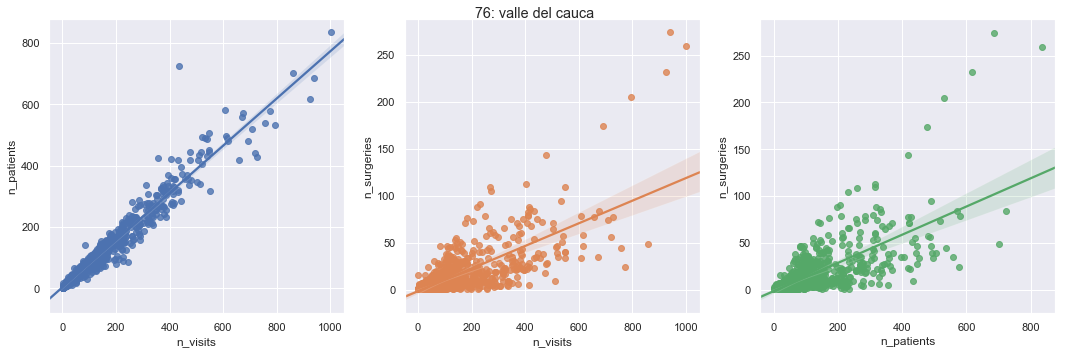

In [15]:
for i in dep_list:
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    fig.suptitle(str(i[0]) + ': ' + str(i[1]))
    sns.regplot(x='n_visits', y='n_patients', data=subpanel[subpanel['dep_code'] == i[0]], ax=ax[0])
    sns.regplot(x='n_visits', y='n_surgeries', data=subpanel[subpanel['dep_code'] == i[0]], ax=ax[1])
    sns.regplot(x='n_patients', y='n_surgeries', data=subpanel[subpanel['dep_code'] == i[0]], ax=ax[2])
    plt.tight_layout()
plt.show()

Conclusions:

Because many medical specialties and departments (locations) don't have enough data, I suggest to concetrate on 8 specialties and 9 departments. All them have data from 2008 to 2012.

The specialties are:  
137, 'general surgery'  
143, 'plastic surgery'  
200, 'dermatology'  
341, 'gynecology and obstetrics'  
480, 'ophthalmology'  
514, 'orthopedics and traumatology'  
521, 'otorhinolaryngology' 
750, 'urology'  

The departments are:  
5, 'antioquia'  
8, 'atlantico'  
11, 'bogota'  
13, 'bolivar'  
17, 'caldas'  
54, 'n. de santander'  
66, 'risaralda'  
68, 'santander'  
76, 'valle del cauca'  

The subpanel dataframe containing this information has 6444 entries. The variables n_patients and n_visits are not the same but are very correlated, so I suggest to use only n_visits. I want to know how much specialty, department and year can explain the variability of the medical practice in terms of n_visits and n_surgeries. If specialty, department and year don't explain much, then there is a good chance that other factors like moral hazard and supplier-induced demand play an important role. 

Potential problem (see graphs below):
- few data for some specialties/departments/years
  - no data for general surgery/santander/2011
  - no data for plastic surgery/bolivar/2010

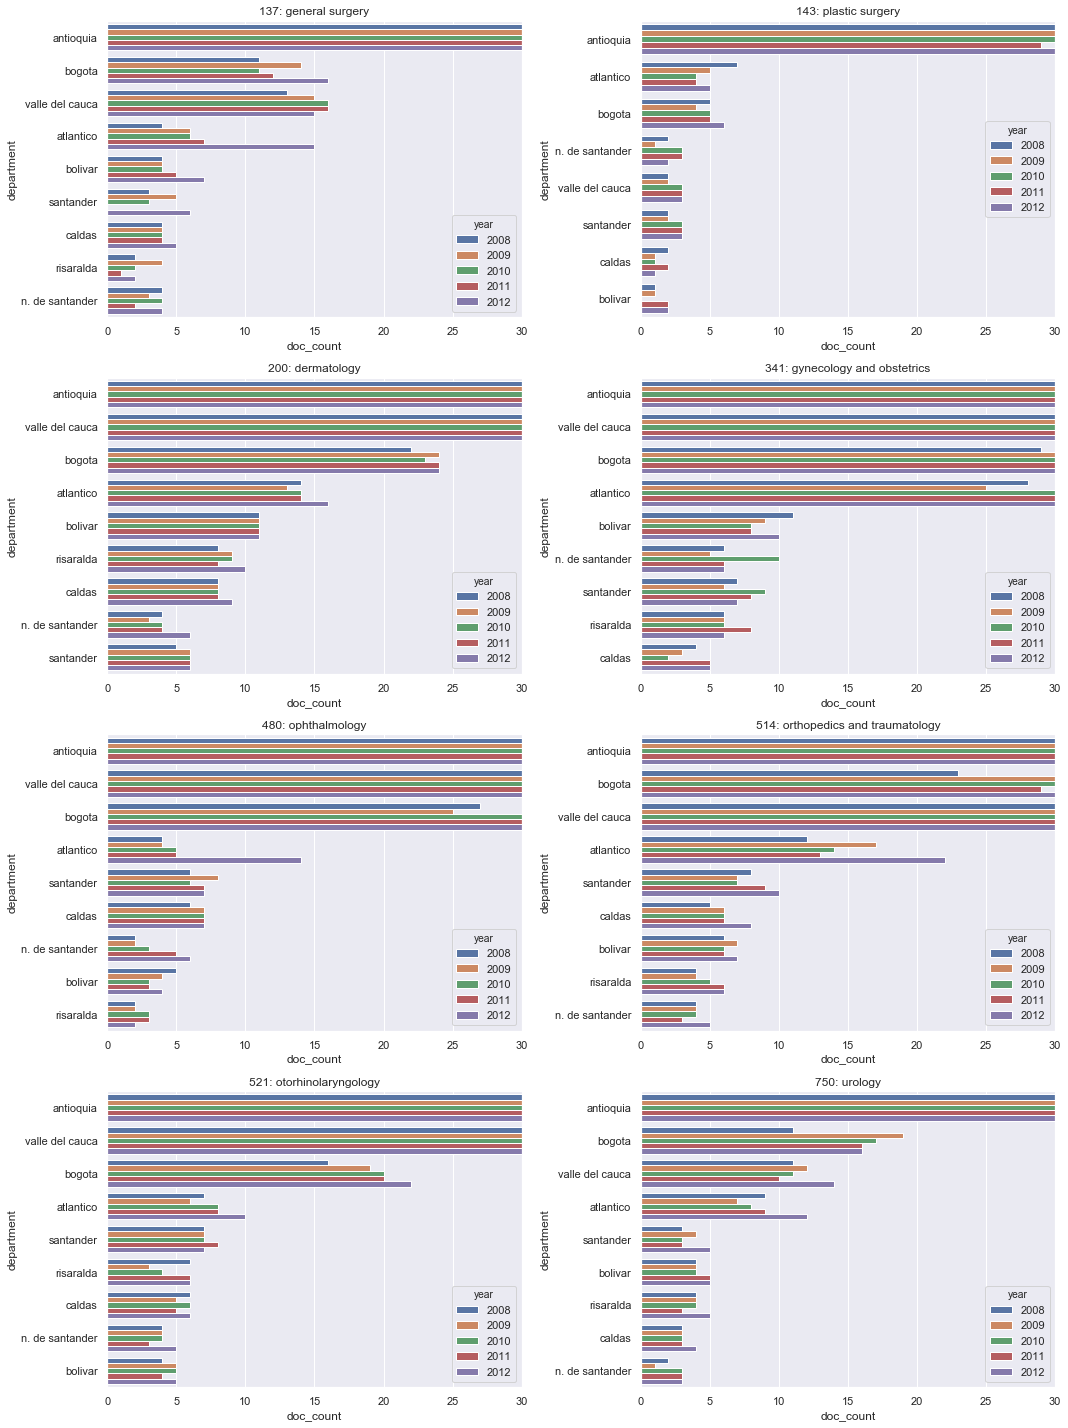

In [16]:
## Here I will take a closer look at those specialties/departments/years with less than 30 doctors.
positions = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]
tuples = zip(positions, spec_list)

fig, ax = plt.subplots(4, 2, figsize=(15,20))
for i in tuples:
    strainer = subpanel['spec_code'] == i[1][0]
    df = subpanel[strainer].groupby(['spec_en','department','year'])[['doc_code']].count()
    df.reset_index(inplace=True)
    df.rename(columns={'doc_code': 'doc_count'}, inplace=True)
    df.sort_values('doc_count', ascending=False, inplace=True)
    ax[i[0][0],i[0][1]].title.set_text(str(i[1][0]) + ': ' + str(i[1][1]))
    ## Here I am setting the max limit of 30 doctors.
    ax[i[0][0],i[0][1]].set(xlim=(0, 30))
    _ = sns.catplot(x='doc_count', y='department', data=df,
                    hue='year', orient='h', kind='bar', ax=ax[i[0][0],i[0][1]])
    plt.close()

plt.tight_layout()
plt.show()